In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn import preprocessing
from linearmodels.system import SUR
from sklearn.decomposition import PCA 
from scipy.stats import boxcox, shapiro
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Contoh SUR dengan Python

In [2]:
# Simulasi data
np.random.seed(0)
n = 100
X1 = np.random.rand(n, 2)
X2 = np.random.rand(n, 2)
beta1 = np.array([1, 2])
beta2 = np.array([3, -1])

# Generate data untuk dua persamaan regresi
y1 = X1 @ beta1 + np.random.normal(0, 1, n)
y2 = X2 @ beta2 + np.random.normal(0, 1, n)

# Gabungkan data dalam bentuk DataFrame
data = pd.DataFrame({    
    'y1': y1,    
    'x1_1': X1[:, 0],    
    'x1_2': X1[:, 1],    
    'y2': y2,    
    'x2_1': X2[:, 0],    
    'x2_2': X2[:, 1],
})

# Define the equations for SUR
formula = {
    'eq1': 'y1 ~ x1_1 + x1_2',
    'eq2': 'y2 ~ x2_1 + x2_2'
}

# Define the SUR model using the formula and data
model = SUR.from_formula(formula, data=data)
result = model.fit()
print(result.summary)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.6801
No. Equations.:                     2   McElroy's R-squared:                 0.4151
No. Observations:                 100   Judge's (OLS) R-squared:             0.4213
Date:                Fri, Nov 15 2024   Berndt's R-squared:                  0.6555
Time:                        16:43:23   Dhrymes's R-squared:                 0.6704
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: eq1, Dependent Variable: y1                     
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
x1_1           0.5666     0.2648     2.1395     0.0324      0.0476      1.0856
x1_2        

Contoh 2: SUR dengan Python

In [3]:
np.random.seed(1)
n = 100

# Independent variables
GDP = np.random.normal(50000, 10000, n)  # GDP in thousands
interest_rate = np.random.normal(5, 1, n)  # Interest rate in percent

# True parameters
alpha1, beta1, gamma1 = 2000, 0.5, -150
alpha2, beta2, gamma2 = 500, 0.3, -100

# Equations for consumption and investment with correlated errors
error1 = np.random.normal(0, 1000, n)
error2 = error1 * 0.5 + np.random.normal(0, 1000, n)  # Correlated error terms

# Dependent variables
consumption = alpha1 + beta1 * GDP + gamma1 * interest_rate + error1
investment = alpha2 + beta2 * GDP + gamma2 * interest_rate + error2

# Create DataFrame
data = pd.DataFrame({
    'consumption': consumption,
    'investment': investment,
    'GDP': GDP,
    'interest_rate': interest_rate
})

# Define the SUR model with a formula dictionary
formula = {
    'consumption_eq': 'consumption ~ GDP + interest_rate',
    'investment_eq': 'investment ~ GDP + interest_rate'
}

# Initialize and fit the SUR model
model = SUR.from_formula(formula, data=data)
result = model.fit()
print(result.summary)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.9976
No. Equations.:                     2   McElroy's R-squared:                 0.9072
No. Observations:                 100   Judge's (OLS) R-squared:             0.9168
Date:                Fri, Nov 15 2024   Berndt's R-squared:                  0.9516
Time:                        16:43:23   Dhrymes's R-squared:                 0.9975
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
            Equation: consumption_eq, Dependent Variable: consumption            
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
GDP               0.5059     0.0090     56.482     0.0000      0.4883      0.5234


In [4]:
# Uji korelasi residual
residuals = result.resids  # Ambil residual
residual_consumption = residuals['consumption_eq']
residual_investment = residuals['investment_eq']

# Hitung koefisien korelasi antara residual
correlation = np.corrcoef(residual_consumption, residual_investment)[0, 1]
print(f'Korelasi antara residual konsumsi dan investasi: {correlation:.4f}')

Korelasi antara residual konsumsi dan investasi: 0.3945


Model seemingly unrelated regressions (SUR) ini menganalisis hubungan antara konsumsi dan investasi dengan variabel independen GDP dan suku bunga, menggunakan error terms yang berkorelasi untuk meniru keterkaitan potensial dalam proses konsumsi dan investasi. 

Hasil estimasi memperlihatkan bahwa parameter GDP dan suku bunga pada persamaan konsumsi (consumption_eq) dan investasi (investment_eq) signifikan, menunjukkan peran penting kedua variabel ini terhadap konsumsi dan investasi. 

Koefisien untuk GDP pada kedua persamaan positif, mengindikasikan bahwa peningkatan GDP berkorelasi dengan peningkatan konsumsi dan investasi, sedangkan koefisien untuk suku bunga negatif, yang masuk akal karena suku bunga yang lebih tinggi dapat mengurangi investasi dan konsumsi.

In [5]:
# Contoh Simulasi Data Ekonomi (sesuaikan dengan data riil Anda)
np.random.seed(0)
n = 100

# Variabel independen
GDP = np.random.normal(1e5, 1e4, n)       # PDB dalam ribuan
interest_rate = np.random.normal(5, 1, n) # Suku bunga dalam persen
exchange_rate = np.random.normal(14000, 500, n) # Nilai tukar

# Variabel dependen (dengan beberapa korelasi antara error)
error1 = np.random.normal(0, 100, n)
error2 = error1 * 0.3 + np.random.normal(0, 100, n) # Korelasi error

# Variabel dependen simulasi
inflation = 0.05 * GDP - 0.2 * interest_rate + 0.1 * exchange_rate + error1
unemployment = -0.1 * GDP + 0.3 * interest_rate - 0.05 * inflation + error2

# Membuat DataFrame
data = pd.DataFrame({
    'GDP': GDP,
    'interest_rate': interest_rate,
    'exchange_rate': exchange_rate,
    'inflation': inflation,
    'unemployment': unemployment
})

# Mendefinisikan model SUR dengan formula
formula = {
    'inflation_eq': 'inflation ~ GDP + interest_rate + exchange_rate',
    'unemployment_eq': 'unemployment ~ GDP + interest_rate + inflation'
}

# Definisikan model SUR
model = SUR.from_formula(formula, data=data)
result = model.fit()
print(result.summary)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.9999
No. Equations.:                     2   McElroy's R-squared:                 0.9860
No. Observations:                 100   Judge's (OLS) R-squared:             0.9858
Date:                Fri, Nov 15 2024   Berndt's R-squared:                  0.9949
Time:                        16:43:23   Dhrymes's R-squared:                 0.9999
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
              Equation: inflation_eq, Dependent Variable: inflation              
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
GDP               0.0490     0.0008     59.216     0.0000      0.0474      0.0506


In [6]:
residuals = result.resids 
residual_consumption = residuals['inflation_eq']
residual_investment = residuals['unemployment_eq']

correlation = np.corrcoef(residual_consumption, residual_investment)[0, 1]
print(f'Korelasi antara residual inflasi dan pengangguran: {correlation:.4f}')

Korelasi antara residual inflasi dan pengangguran: 0.1092


### DATA

In [7]:
file1 = pd.read_csv('data/inflasi fred.csv')
file1 = file1.drop(file1.index[0:31], axis=0)
file1 = file1.rename(columns={'FPCPITOTLZGIDN': 'INFLASI'})
print(file1.shape)
file1.head()

(33, 2)


,DATE,INFLASI
31,1991-01-01,9.419058
32,1992-01-01,7.523517
33,1993-01-01,9.671893
34,1994-01-01,8.532005
35,1995-01-01,9.420323


In [8]:
file2 = pd.read_csv('data/penganguran fred.csv')
file2 = file2.rename(columns={'SLUEM1524ZSIDN': 'PENGANGGURAN'})
print(file2.shape)
file2.head()

(33, 2)


,DATE,PENGANGGURAN
0,1991-01-01,7.866
1,1992-01-01,8.242
2,1993-01-01,8.565
3,1994-01-01,13.108
4,1995-01-01,14.013


In [9]:
file3 = pd.read_csv('data/sukubunga fred.csv')
file3 = file3.iloc[1:, :] 
file3 = file3.rename(columns={'IRSTCB01IDM156N': 'SUKU_BUNGA'})
print(file3.shape)
file3.head()

(33, 2)


,DATE,SUKU_BUNGA
1,1991-01-01,19.312500
2,1992-01-01,15.987500
3,1993-01-01,10.617500
4,1994-01-01,10.294167
5,1995-01-01,14.111667


In [10]:
file4 = pd.read_csv('data/kurs fred.csv')
file4 = file4.drop(file4.index[0:1], axis=0)
file4 = file4.rename(columns={'CCRETT01IDM661N': 'NILAI_TUKAR'})
print(file4.shape)
file4.head()

(33, 2)


,DATE,NILAI_TUKAR
1,1991-01-01,120.911342
2,1992-01-01,117.321483
3,1993-01-01,121.661275
4,1994-01-01,120.982708
5,1995-01-01,117.086225


In [11]:
file5 = pd.read_csv('data/gdp fred.csv')
file5 = file5.drop(file5.index[0:31], axis=0)
file5 = file5.rename(columns={'NYGDPPCAPKDIDN': 'GDP'})
print(file5.shape)
file5.head()

(33, 2)


,DATE,GDP
31,1991-01-01,1556.806664
32,1992-01-01,1629.847978
33,1993-01-01,1706.952365
34,1994-01-01,1805.603885
35,1995-01-01,1922.352118


In [12]:
file6 = pd.read_csv('data/konsumsi fred.csv')
file6 = file6.drop(file6.index[0:2], axis=0)
file6 = file6.rename(columns={'PLCCPPIDA670NRUG': 'KONSUMSI_RT'})

mean_value = file6['KONSUMSI_RT'].mean()
new_rows = pd.DataFrame({
    'DATE': ['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01'],
    'KONSUMSI_RT': [mean_value] * 4
})
file6u = pd.concat([file6, new_rows], ignore_index=True)
print(file6u.shape)
file6u.head()

(33, 2)


,DATE,KONSUMSI_RT
0,1991-01-01,0.217840
1,1992-01-01,0.223746
2,1993-01-01,0.241392
3,1994-01-01,0.259007
4,1995-01-01,0.272217


In [13]:
file7 = pd.read_csv('data/money fred.csv')
file7 = file7.drop(file7.index[0:1], axis=0)
file7 = file7.rename(columns={'MABMM301IDA189S_NBD19900101': 'UANG_BEREDAR'})
mean_value = file7['UANG_BEREDAR'].mean()
new_rows = pd.DataFrame({
    'DATE': ['2023-01-01'],
    'UANG_BEREDAR': [mean_value] * 1
})
file7u = pd.concat([file7, new_rows], ignore_index=True)
print(file7u.shape)
file7u.head()

(33, 2)


,DATE,UANG_BEREDAR
0,1991-01-01,125.71635
1,1992-01-01,152.27847
2,1993-01-01,181.95688
3,1994-01-01,220.98952
4,1995-01-01,275.78751


In [14]:
file8 = pd.read_csv('data/commudity fred.csv')
file8 = file8.drop(file8.index[0:1], axis=0)
file8 = file8.drop(file8.index[-1], axis=0)
file8 = file8.rename(columns={'XTEXVA01IDM664S_NBD19900101': 'KOMODITAS'})
file8['KOMODITAS'] = pd.to_numeric(file8['KOMODITAS'], errors='coerce')
print(file8.shape)
file8.head()

(33, 2)


,DATE,KOMODITAS
1,1991-01-01,120.40732
2,1992-01-01,145.69782
3,1993-01-01,162.83676
4,1994-01-01,183.17008
5,1995-01-01,216.36225


### PROCESSING

Dataset berasal dari web Federal Reserve Economic Data dengan batasan hanya Negara Indonesia pada tahun 1991 - 2023. Didapatkan data berdimensi 33 x 9.

In [15]:
df = (file1
    .merge(file2, on=['DATE'])
    .merge(file3, on=['DATE'])
    .merge(file4, on=['DATE'])
    .merge(file5, on=['DATE'])
    .merge(file6u, on=['DATE'])
    .merge(file7u, on=['DATE'])
    .merge(file8, on=['DATE']))
df.to_csv('data/data.csv', index=False)
df.head(10)

,DATE,INFLASI,PENGANGGURAN,SUKU_BUNGA,NILAI_TUKAR,GDP,KONSUMSI_RT,UANG_BEREDAR,KOMODITAS
0,1991-01-01,9.419058,7.866,19.312500,120.911342,1556.806664,0.217840,125.71635,120.40732
1,1992-01-01,7.523517,8.242,15.987500,117.321483,1629.847978,0.223746,152.27847,145.69782
2,1993-01-01,9.671893,8.565,10.617500,121.661275,1706.952365,0.241392,181.95688,162.83676
3,1994-01-01,8.532005,13.108,10.294167,120.982708,1805.603885,0.259007,220.98952,183.17008
4,1995-01-01,9.420323,14.013,14.111667,117.086225,1922.352118,0.272217,275.78751,216.36225
5,1996-01-01,7.973281,14.951,13.819167,125.827775,2039.362989,0.284147,353.57927,246.89667
6,1997-01-01,6.226142,14.958,14.497500,119.338047,2101.254149,0.249438,444.80514,329.78977
7,1998-01-01,58.451044,16.757,49.324167,57.422148,1797.083922,0.130382,721.26562,1047.66752
8,1999-01-01,20.477831,19.296,23.142500,84.404350,1784.333595,0.208632,878.11757,803.19346
9,2000-01-01,3.688619,19.177,12.546667,82.134293,1845.227801,0.192449,964.96506,1111.08672


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          33 non-null     object 
 1   INFLASI       33 non-null     float64
 2   PENGANGGURAN  33 non-null     float64
 3   SUKU_BUNGA    33 non-null     float64
 4   NILAI_TUKAR   33 non-null     float64
 5   GDP           33 non-null     float64
 6   KONSUMSI_RT   33 non-null     float64
 7   UANG_BEREDAR  33 non-null     float64
 8   KOMODITAS     33 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.4+ KB


### Eksplorasi

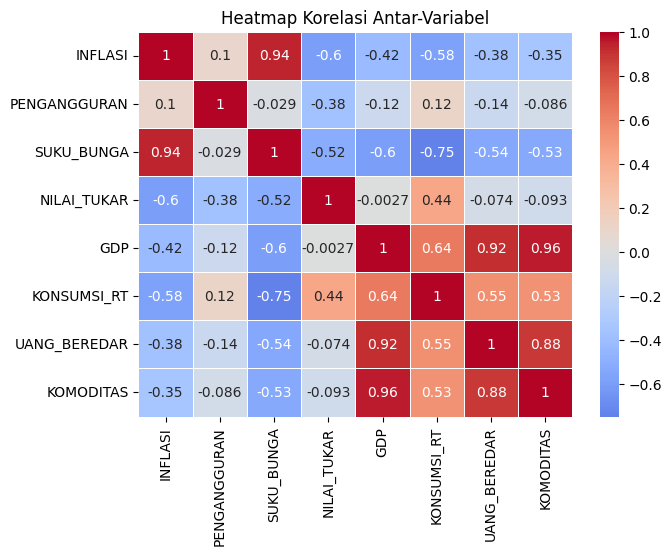

In [17]:
df_no_date = df.drop(columns=['DATE'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_no_date.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap Korelasi Antar-Variabel')
plt.show()

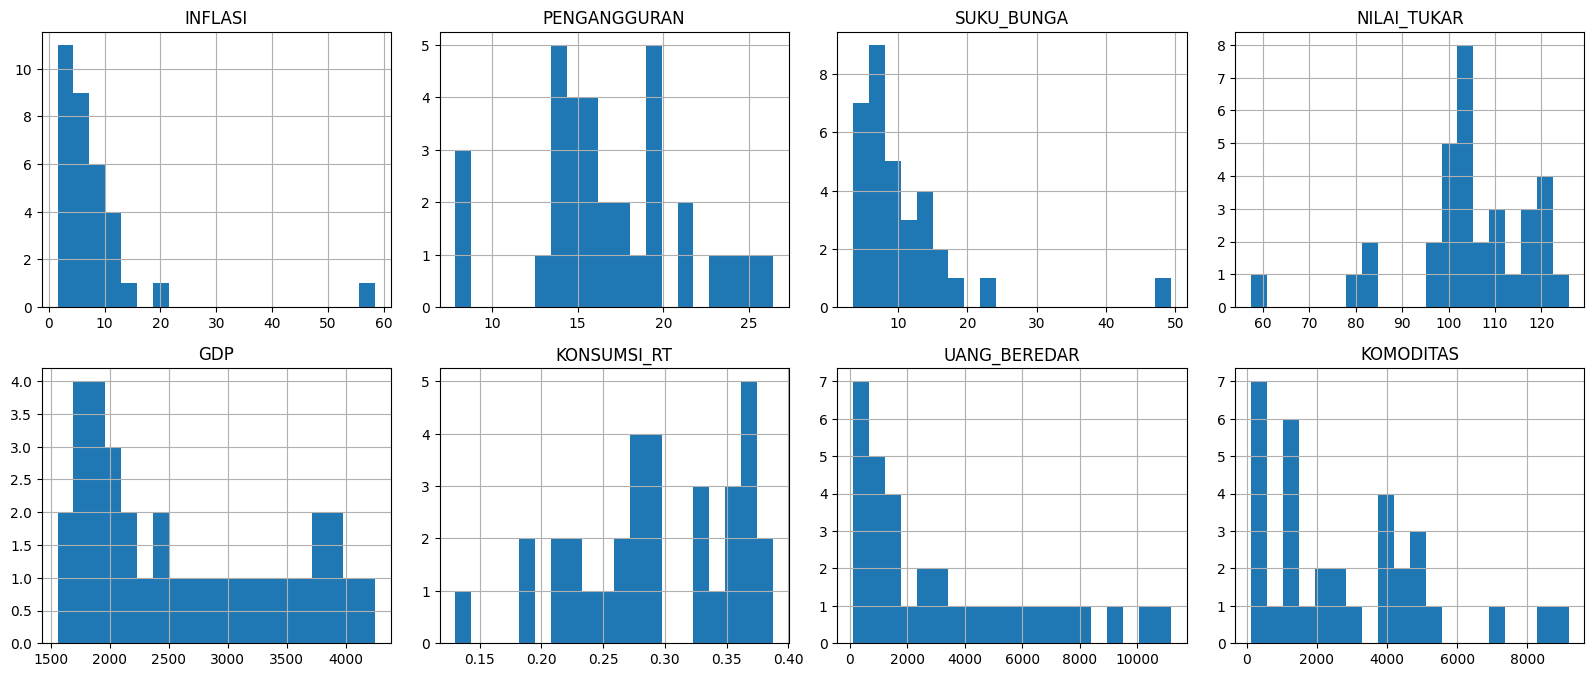

In [18]:
df.hist(bins=20, figsize=(16, 10), layout=(int(np.ceil(len(df.columns) / 4)), 4))
plt.tight_layout()
plt.show()

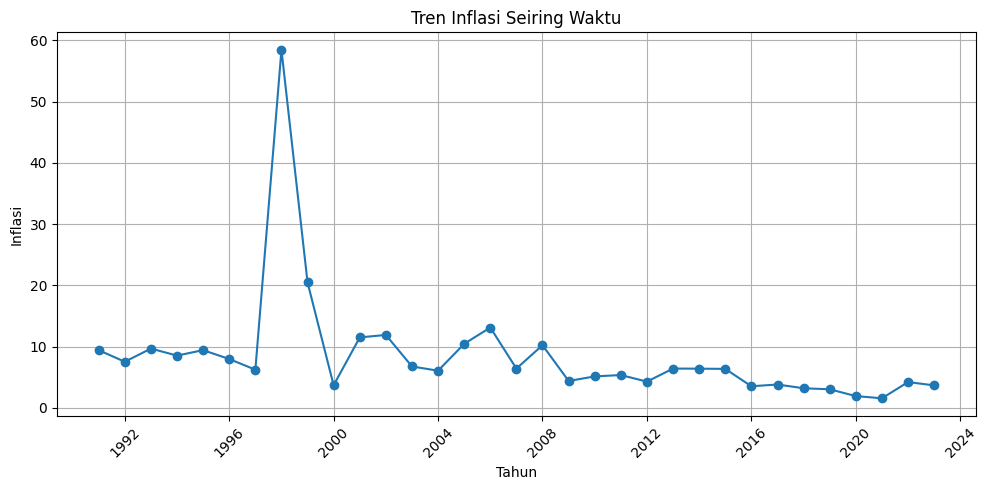

In [19]:
df['DATE'] = pd.to_datetime(df['DATE'])

plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['INFLASI'], marker='o', linestyle='-')
plt.title('Tren Inflasi Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Inflasi')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Kolom INFLASI - Shapiro-Wilk Test p-value: 0.0000
-> Kolom INFLASI tidak berdistribusi normal. Menerapkan transformasi Box-Cox.
   * Transformasi Box-Cox diterapkan untuk kolom INFLASI.
Kolom PENGANGGURAN - Shapiro-Wilk Test p-value: 0.4102
Kolom SUKU_BUNGA - Shapiro-Wilk Test p-value: 0.0000
-> Kolom SUKU_BUNGA tidak berdistribusi normal. Menerapkan transformasi Box-Cox.
   * Transformasi Box-Cox diterapkan untuk kolom SUKU_BUNGA.
Kolom NILAI_TUKAR - Shapiro-Wilk Test p-value: 0.0064
-> Kolom NILAI_TUKAR tidak berdistribusi normal. Menerapkan transformasi Box-Cox.
   * Transformasi Box-Cox diterapkan untuk kolom NILAI_TUKAR.
Kolom GDP - Shapiro-Wilk Test p-value: 0.0064
-> Kolom GDP tidak berdistribusi normal. Menerapkan transformasi Box-Cox.
   * Transformasi Box-Cox diterapkan untuk kolom GDP.
Kolom KONSUMSI_RT - Shapiro-Wilk Test p-value: 0.1205
Kolom UANG_BEREDAR - Shapiro-Wilk Test p-value: 0.0007
-> Kolom UANG_BEREDAR tidak berdistribusi normal. Menerapkan transformasi Box-Cox.


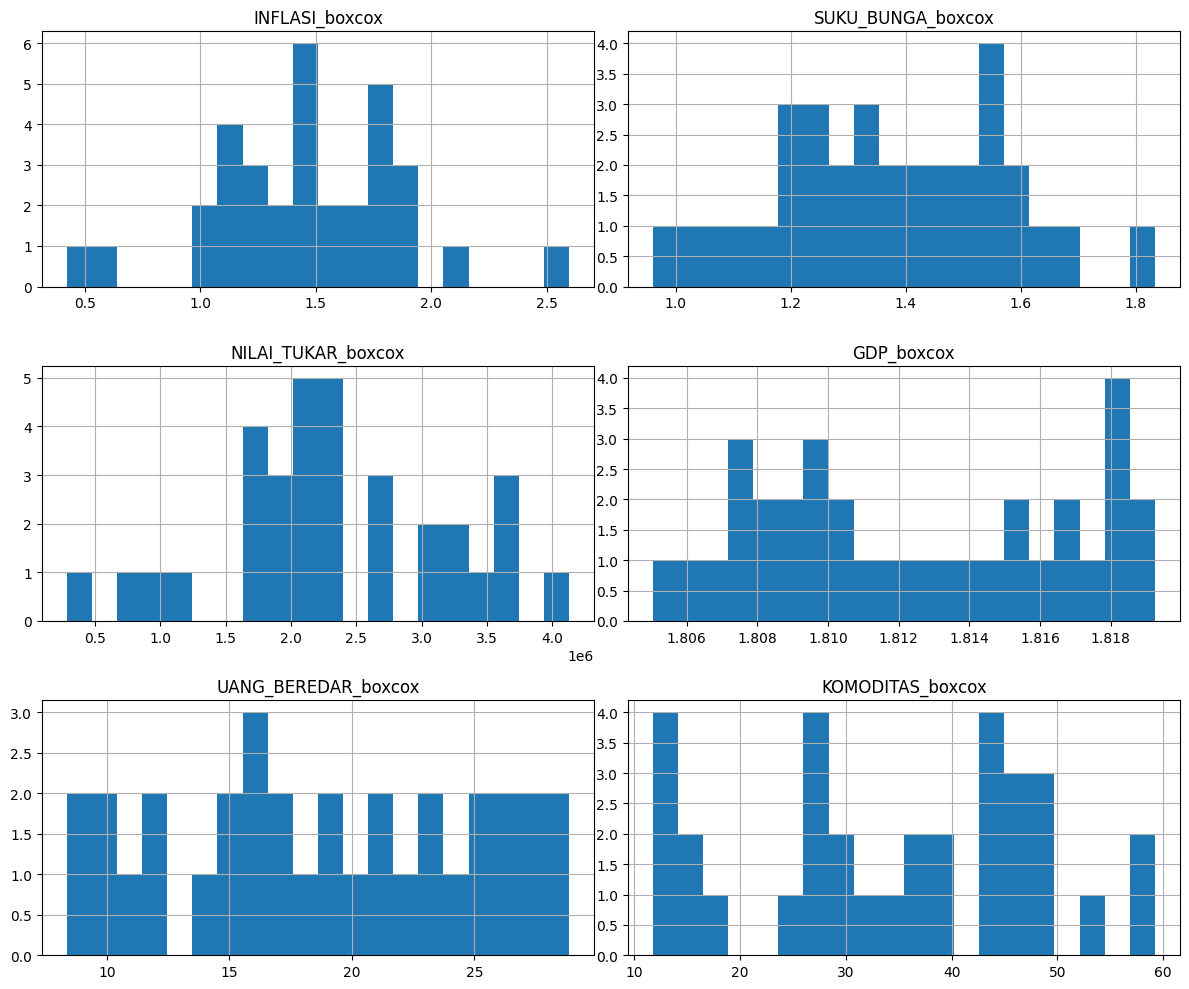

In [20]:
df = df.drop(columns=['DATE'])
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    print(f"Kolom {column} - Shapiro-Wilk Test p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"-> Kolom {column} tidak berdistribusi normal. Menerapkan transformasi Box-Cox.")
        # Terapkan transformasi Box-Cox jika data positif
        if (df[column] > 0).all():
            df[column + '_boxcox'], _ = boxcox(df[column])
            print(f"   * Transformasi Box-Cox diterapkan untuk kolom {column}.")

# Menampilkan histogram untuk hasil transformasi Box-Cox
boxcox_columns = [col for col in df.columns if '_boxcox' in col]
df[boxcox_columns].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [21]:
# df = df.drop(columns=['DATE'])
# for column in df.columns:
#     stat, p_value = shapiro(df[column].dropna())
#     print(f"Kolom {column} - Shapiro-Wilk Test p-value: {p_value:.4f}")
#     if p_value < 0.05:
#         print(f"-> Kolom {column} tidak berdistribusi normal. Menerapkan transformasi yang sesuai.")

#         # Terapkan transformasi log jika data positif
#         if (df[column] > 0).all():
#             df[column + '_log'] = np.log(df[column])
#             print(f"   * Transformasi log diterapkan untuk kolom {column}.")
        
#         # Terapkan transformasi akar
#         df[column + '_sqrt'] = np.sqrt(df[column])
#         print(f"   * Transformasi akar diterapkan untuk kolom {column}.")

#         # Terapkan transformasi Box-Cox jika data positif
#         if (df[column] > 0).all():
#             df[column + '_boxcox'], _ = boxcox(df[column])
#             print(f"   * Transformasi Box-Cox diterapkan untuk kolom {column}.")
        
# transformed_columns = [col for col in df.columns if '_log' in col or '_sqrt' in col or '_boxcox' in col]
# df[transformed_columns].hist(bins=20, figsize=(12, 10))
# plt.tight_layout()
# plt.show()

In [22]:
# df['DATE'] = pd.to_datetime(df['DATE'])
# plt.figure(figsize=(14, 8))
# plt.plot(df['DATE'], df['INFLASI'], label='Inflasi')
# plt.plot(df['DATE'], df['PENGANGGURAN'], label='Pengangguran')
# plt.plot(df['DATE'], df['SUKU_BUNGA'], label='Suku Bunga')
# plt.plot(df['DATE'], df['NILAI_TUKAR'], label='Nilai Tukar')
# plt.plot(df['DATE'], df['GDP'], label='GDP')
# plt.plot(df['DATE'], df['KONSUMSI_RT'], label='Konsumsi RT')
# plt.plot(df['DATE'], df['UANG_BEREDAR'], label='Uang Beredar')
# plt.plot(df['DATE'], df['KOMODITAS'], label='Komoditas')

# plt.xlabel('Tahun')
# plt.ylabel('Nilai')
# plt.title('Perubahan Variabel Ekonomi dari Waktu ke Waktu')
# plt.legend(loc='best')
# plt.show()

### Pengecekan Asumsi Model 

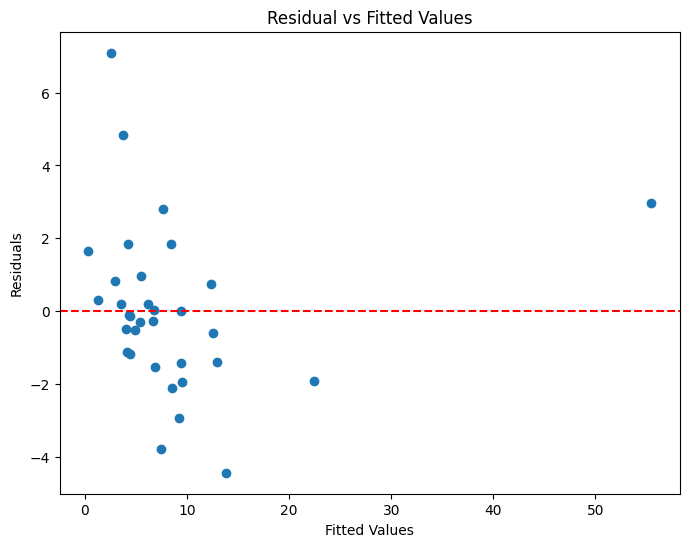


Variance Inflation Factor (VIF):
       Variable         VIF
0         const  563.670377
1  PENGANGGURAN    2.559520
2    SUKU_BUNGA    3.947256
3   NILAI_TUKAR    4.545101
4           GDP   24.844171
5   KONSUMSI_RT    4.599190
6  UANG_BEREDAR    7.099528
7     KOMODITAS   14.887579


In [23]:
X = df[['PENGANGGURAN', 'SUKU_BUNGA', 'NILAI_TUKAR', 'GDP', 'KONSUMSI_RT', 'UANG_BEREDAR', 'KOMODITAS']]
y = df['INFLASI']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 1. Pengecekan Linearitas: plot residual vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 4. Pengecekan Multikolinearitas: Menggunakan Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

In [24]:
# Transformasi log pada variabel dependen
y_log = np.log(y)
model_log = sm.OLS(y_log, X).fit()

# Uji Breusch-Pagan untuk heteroskedastisitas
_, p_value_bp_log, _, _ = het_breuschpagan(model_log.resid, model_log.model.exog)
print(f'Uji Breusch-Pagan setelah log-transform: p-value = {p_value_bp_log}')
if p_value_bp_log > 0.05:
    print("Tidak terdapat heteroskedastisitas setelah transformasi log.")
else:
    print("Terdapat heteroskedastisitas setelah transformasi log.")

Uji Breusch-Pagan setelah log-transform: p-value = 0.0999007899342238
Tidak terdapat heteroskedastisitas setelah transformasi log.


In [25]:
pca = PCA(n_components=7) 
X_pca = pca.fit_transform(X) 
# model_pca = sm.OLS(y, X_pca).fit()
# print(model_pca.summary())

vif_data_pca = pd.DataFrame()
vif_data_pca["Variable"] = [f'PC{i+1}' for i in range(X_pca.shape[1])]
vif_data_pca["VIF"] = [variance_inflation_factor(X_pca, i) for i in range(X_pca.shape[1])]
print(vif_data_pca)

  Variable  VIF
0      PC1  1.0
1      PC2  1.0
2      PC3  1.0
3      PC4  1.0
4      PC5  1.0
5      PC6  1.0
6      PC7  1.0


### Menduga model menggunakan OLS 

In [26]:
#Persamaan 1: Model OLS untuk INFLASI
y_inflasi = df['INFLASI'] 
X_inflasi = df[['GDP', 'SUKU_BUNGA', 'NILAI_TUKAR', 'UANG_BEREDAR']]  
X_inflasi = sm.add_constant(X_inflasi)  
model_inflasi = sm.OLS(y_inflasi, X_inflasi)
results_inflasi = model_inflasi.fit()
print(">>>>> Hasil Model OLS untuk INFLASI")
print(results_inflasi.summary())
print("\n")

# Persamaan 2: Model OLS untuk PENGANGGURAN
y_pengangguran = df['PENGANGGURAN']  # Variabel dependen
X_pengangguran = df[['GDP', 'SUKU_BUNGA', 'INFLASI', 'KOMODITAS']] 
X_pengangguran = sm.add_constant(X_pengangguran) 
model_pengangguran = sm.OLS(y_pengangguran, X_pengangguran)
results_pengangguran = model_pengangguran.fit()
print(">>>>> Hasil Model OLS untuk PENGANGGURAN")
print(results_pengangguran.summary())

# Persamaan 3: Model OLS untuk NILAI TUKAR
y_nikar = df['NILAI_TUKAR']
X_nikar = df[['GDP', 'SUKU_BUNGA', 'UANG_BEREDAR', 'KOMODITAS']]
X_nikar = sm.add_constant(X_nikar)
model_nikar = sm.OLS(y_nikar, X_nikar)
results_nikar = model_nikar.fit()
print(">>>>> Hasil Model OLS untuk PENGANGGURAN")
print(results_nikar.summary())

>>>>> Hasil Model OLS untuk INFLASI
                            OLS Regression Results                            
Dep. Variable:                INFLASI   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     68.48
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.77e-14
Time:                        16:43:26   Log-Likelihood:                -82.223
No. Observations:                  33   AIC:                             174.4
Df Residuals:                      28   BIC:                             181.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

Melakukan uji kenormalan galat

In [27]:
korelasi = df[['INFLASI', 'PENGANGGURAN']].corr()
print(korelasi)

# Menggunakan uji Granger Causality
grangercausalitytests(df[['INFLASI', 'PENGANGGURAN']], maxlag=2)

               INFLASI  PENGANGGURAN
INFLASI       1.000000      0.099702
PENGANGGURAN  0.099702      1.000000

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0178  , p=0.8948  , df_denom=29, df_num=1
ssr based chi2 test:   chi2=0.0196  , p=0.8885  , df=1
likelihood ratio test: chi2=0.0196  , p=0.8885  , df=1
parameter F test:         F=0.0178  , p=0.8948  , df_denom=29, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0550  , p=0.9466  , df_denom=26, df_num=2
ssr based chi2 test:   chi2=0.1312  , p=0.9365  , df=2
likelihood ratio test: chi2=0.1309  , p=0.9366  , df=2
parameter F test:         F=0.0550  , p=0.9466  , df_denom=26, df_num=2


{1: ({'ssr_ftest': (0.017804422578438162, 0.8947724289241081, 29.0, 1),
   'ssr_chi2test': (0.01964625939689728, 0.8885295341464327, 1),
   'lrtest': (0.01964023099685619, 0.8885465259717953, 1),
   'params_ftest': (0.01780442257843776, 0.8947724289241176, 29.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.05502943152214306, 0.9465672226966714, 26.0, 2),
   'ssr_chi2test': (0.13122402901434116, 0.9364941399546404, 2),
   'lrtest': (0.13094707248137638, 0.9366238330193404, 2),
   'params_ftest': (0.055029431522142055, 0.9465672226966727, 26.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

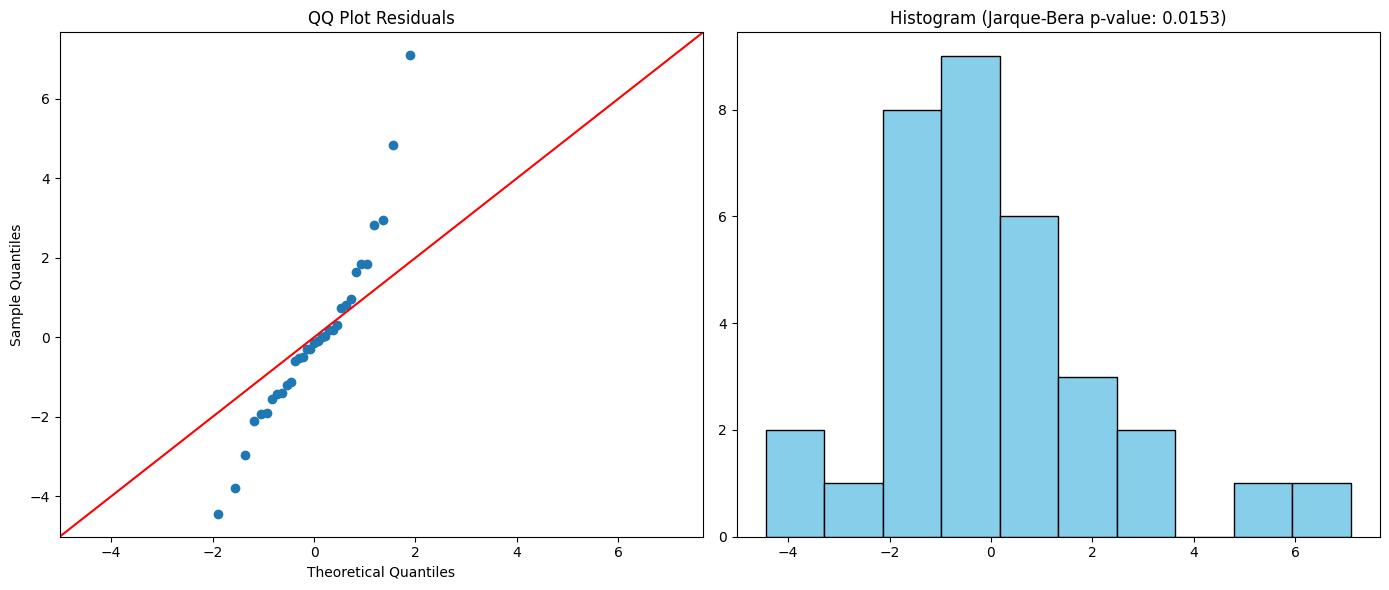

Jarque-Bera Test: Statistic = 8.362330125584828, p-value = 0.01528069422362663


In [28]:
X = df[['PENGANGGURAN', 'SUKU_BUNGA', 'NILAI_TUKAR', 'GDP', 'KONSUMSI_RT', 'UANG_BEREDAR', 'KOMODITAS']]
y = df['INFLASI']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

# 1. Uji Kenormalan dengan QQ Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sm.qqplot(residuals, line ='45', ax=ax[0])
ax[0].set_title('QQ Plot Residuals')

# 2. Uji Jarque-Bera
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
ax[1].hist(residuals, bins=10, color='skyblue', edgecolor='black')
ax[1].set_title(f'Histogram (Jarque-Bera p-value: {jb_pvalue:.4f})')
plt.tight_layout()
plt.show()

print(f"Jarque-Bera Test: Statistic = {jb_stat}, p-value = {jb_pvalue}")

Melakukan uji korelasi kesebayaan antar galat.

In [29]:
# Definisikan variabel independen dan dependen
X = df[['PENGANGGURAN', 'SUKU_BUNGA', 'NILAI_TUKAR', 'GDP', 'KONSUMSI_RT', 'UANG_BEREDAR', 'KOMODITAS']]
y = df['INFLASI']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

# 1. Uji Durbin-Watson untuk autokorelasi
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")

# 2. Korelasi antar residual yang bergeser (lagged residuals)
lagged_residuals = residuals.shift(1).dropna()  # Menggeser residual untuk mendapatkan lag
current_residuals = residuals.iloc[1:]  # Mengambil residual yang dimulai dari indeks ke-1
correlation = current_residuals.corr(lagged_residuals)
print(f"Correlation between current and lagged residuals: {correlation}")

Durbin-Watson Statistic: 1.497119784147691
Correlation between current and lagged residuals: 0.20543162824423114


### Menyusun model SUR

In [30]:
formula = {
    'inflasi_eq': 'INFLASI ~ GDP + SUKU_BUNGA + NILAI_TUKAR + UANG_BEREDAR',
    'pengangguran_eq': 'PENGANGGURAN ~ GDP + SUKU_BUNGA + INFLASI + KOMODITAS',
    'nilai_tukar_eq': 'NILAI_TUKAR ~ GDP + SUKU_BUNGA + UANG_BEREDAR + KOMODITAS'}
model = SUR.from_formula(formula, data=df)
result = model.fit()
print(result.summary)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.9788
No. Equations.:                     3   McElroy's R-squared:                 0.7686
No. Observations:                  33   Judge's (OLS) R-squared:             0.1838
Date:                Fri, Nov 15 2024   Berndt's R-squared:                  0.7579
Time:                        16:43:27   Dhrymes's R-squared:                 0.9669
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
               Equation: inflasi_eq, Dependent Variable: INFLASI                
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
GDP              0.0020     0.0014     1.3952     0.1630     -0.0008      0.0048
SUKU

In [31]:
residuals = result.resids
residual_inflasi = residuals['inflasi_eq']
residual_pengangguran = residuals['pengangguran_eq']
residual_nilai_tukar = residuals['nilai_tukar_eq']

correlation_inflasi_pengangguran = np.corrcoef(residual_inflasi, residual_pengangguran)[0, 1]
correlation_inflasi_nilai_tukar = np.corrcoef(residual_inflasi, residual_nilai_tukar)[0, 1]
correlation_pengangguran_nilai_tukar = np.corrcoef(residual_pengangguran, residual_nilai_tukar)[0, 1]

print(f'Korelasi antara residual inflasi dan pengangguran: {correlation_inflasi_pengangguran:.4f}')
print(f'Korelasi antara residual inflasi dan nilai tukar: {correlation_inflasi_nilai_tukar:.4f}')
print(f'Korelasi antara residual pengangguran dan nilai tukar: {correlation_pengangguran_nilai_tukar:.4f}')

Korelasi antara residual inflasi dan pengangguran: 0.1536
Korelasi antara residual inflasi dan nilai tukar: 0.1375
Korelasi antara residual pengangguran dan nilai tukar: 0.0401


In [32]:
formula = {
    'inflasi_eq': 'INFLASI ~ GDP + SUKU_BUNGA + NILAI_TUKAR + UANG_BEREDAR',
    'pengangguran_eq': 'PENGANGGURAN ~ GDP + SUKU_BUNGA + INFLASI + KOMODITAS',
    'nilai_tukar_eq': 'NILAI_TUKAR ~ GDP + SUKU_BUNGA + UANG_BEREDAR + KOMODITAS',
    'konsumsi_rt_eq': 'KONSUMSI_RT ~ GDP + INFLASI + SUKU_BUNGA + UANG_BEREDAR'}
model = SUR.from_formula(formula, data=df)
result = model.fit()
# print(result.summary)
residuals = result.resids
residual_inflasi = residuals['inflasi_eq']
residual_pengangguran = residuals['pengangguran_eq']
residual_nilai_tukar = residuals['nilai_tukar_eq']
residual_konsumsi_rt = residuals['konsumsi_rt_eq']

correlation_inflasi_pengangguran = np.corrcoef(residual_inflasi, residual_pengangguran)[0, 1]
correlation_inflasi_nilai_tukar = np.corrcoef(residual_inflasi, residual_nilai_tukar)[0, 1]
correlation_inflasi_konsumsi_rt = np.corrcoef(residual_inflasi, residual_konsumsi_rt)[0, 1]
correlation_pengangguran_nilai_tukar = np.corrcoef(residual_pengangguran, residual_nilai_tukar)[0, 1]
correlation_pengangguran_konsumsi_rt = np.corrcoef(residual_pengangguran, residual_konsumsi_rt)[0, 1]
correlation_nilai_tukar_konsumsi_rt = np.corrcoef(residual_nilai_tukar, residual_konsumsi_rt)[0, 1]

print(f'Korelasi antara residual inflasi dan pengangguran: {correlation_inflasi_pengangguran:.4f}')
print(f'Korelasi antara residual inflasi dan nilai tukar: {correlation_inflasi_nilai_tukar:.4f}')
print(f'Korelasi antara residual inflasi dan konsumsi_rt: {correlation_inflasi_konsumsi_rt:.4f}')
print(f'Korelasi antara residual pengangguran dan nilai tukar: {correlation_pengangguran_nilai_tukar:.4f}')
print(f'Korelasi antara residual pengangguran dan konsumsi_rt: {correlation_pengangguran_konsumsi_rt:.4f}')
print(f'Korelasi antara residual nilai tukar dan konsumsi_rt: {correlation_nilai_tukar_konsumsi_rt:.4f}')

Korelasi antara residual inflasi dan pengangguran: 0.1563
Korelasi antara residual inflasi dan nilai tukar: 0.2353
Korelasi antara residual inflasi dan konsumsi_rt: 0.6290
Korelasi antara residual pengangguran dan nilai tukar: 0.0030
Korelasi antara residual pengangguran dan konsumsi_rt: 0.2051
Korelasi antara residual nilai tukar dan konsumsi_rt: 0.3549


In [33]:
# # Mengambil residual untuk masing-masing persamaan dari hasil model SUR
# residuals = result.resids
# residual_inflasi = residuals['inflasi_eq']
# residual_pengangguran = residuals['pengangguran_eq']
# residual_nilai_tukar = residuals['nilai_tukar_eq']

# # Fungsi untuk membuat QQ Plot dan uji Jarque-Bera
# def normality_test(residuals, model_name):
#     # QQ Plot
#     sm.qqplot(residuals, line='s')
#     plt.title(f'QQ Plot Residual {model_name}')
#     plt.show()
    
#     # Uji Jarque-Bera
#     jb_stat, jb_pvalue = jarque_bera(residuals)  # Memperbaiki unpacking menjadi 2 nilai saja
#     print(f'Uji Jarque-Bera untuk {model_name}:')
#     print(f'  Statistik JB: {jb_stat:.4f}')
#     print(f'  P-value: {jb_pvalue:.4f}')
#     if jb_pvalue > 0.05:
#         print("  Kesimpulan: Residual berdistribusi normal (tidak ada bukti untuk menolak H0).\n")
#     else:
#         print("  Kesimpulan: Residual tidak berdistribusi normal (menolak H0).\n")

# # Uji kenormalan untuk masing-masing model
# normality_test(residual_inflasi, 'INFLASI')
# normality_test(residual_pengangguran, 'PENGANGGURAN')
# normality_test(residual_nilai_tukar, 'NILAI_TUKAR')

Uji Kesesuaian Model 

In [34]:
X = df[['GDP', 'SUKU_BUNGA', 'NILAI_TUKAR', 'UANG_BEREDAR']]
y = df['INFLASI']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# print(model.summary())

# Uji F untuk keseluruhan model (lihat bagian Prob (F-statistic) pada ringkasan)
f_statistic = model.f_pvalue
print(f'Hasil Uji F (Signifikansi keseluruhan model): p-value = {f_statistic:.4f}\n')

# Uji t untuk masing-masing koefisien (lihat pada ringkasan model)
for variable, p_value in model.pvalues.items():
    print(f'Uji t untuk koefisien {variable}: p-value = {p_value:.4f}')

Hasil Uji F (Signifikansi keseluruhan model): p-value = 0.0000

Uji t untuk koefisien const: p-value = 0.6749
Uji t untuk koefisien GDP: p-value = 0.2592
Uji t untuk koefisien SUKU_BUNGA: p-value = 0.0000
Uji t untuk koefisien NILAI_TUKAR: p-value = 0.3002
Uji t untuk koefisien UANG_BEREDAR: p-value = 0.9703
